In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Master_Data_File.csv")
data.columns.values.view()
del data['Unnamed: 0']
data.iloc[:,1] = data.iloc[:,1].str.replace(',', '').astype(int)
data.iloc[:,3] = data.iloc[:,3].str.replace('over', '200000').astype(int)
data.iloc[:,7] = data.iloc[:,7].str.replace('over ', '').astype(int)

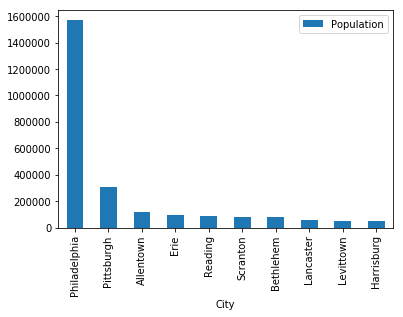

In [3]:
largestPopulation = data.nlargest(10,'Population')
largestPopulation = largestPopulation.iloc[:,[0,1]]
largestPopulation.plot.bar(x='City')

Atglen


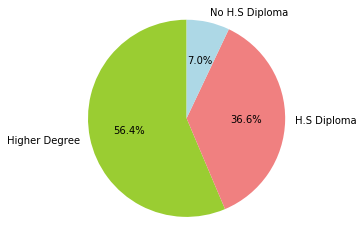

Marienville


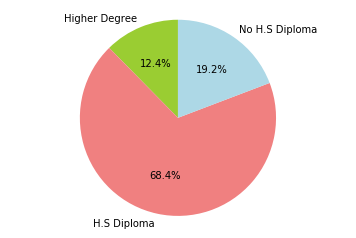

In [4]:
educationData = data.iloc[:,[0,10,11,12]]
educationData1 = educationData.nlargest(1, 'Higher Degree')
educationData2 = educationData.nlargest(1, 'No H.S Diploma')
educationData = educationData1.append(educationData2)

for index in range(2):
    labels = 'Higher Degree','H.S Diploma','No H.S Diploma'
    sizes = [educationData.iloc[index,1],educationData.iloc[index,2],educationData.iloc[index,3]]
    city = educationData.iloc[index,0]
    colors = ['yellowgreen','lightcoral','lightblue']
    plt.title = city
    plt.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%',startangle=90)
    plt.axis('equal')
    print(city)
    plt.show()

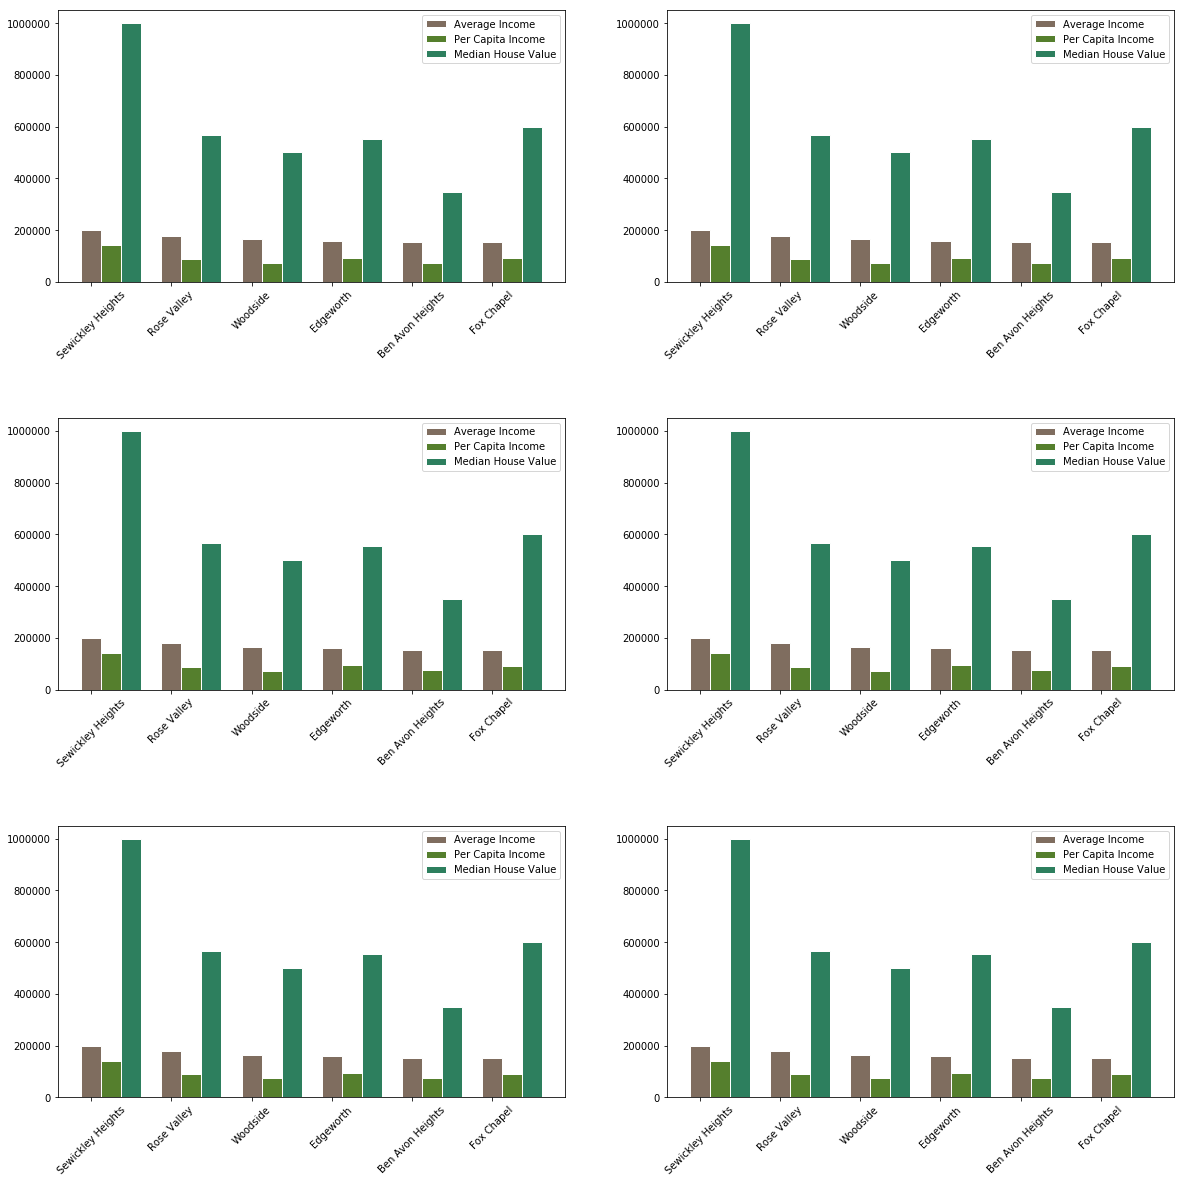

In [5]:
valueData = data.iloc[:,[0,3,6,7]]
valueData = valueData.nlargest(6,'Average Income')

fig, axes = plt.subplots(3,2,figsize=(20,20))
fig.subplots_adjust(hspace = 0.5)
barWidth = 0.25
r1 = np.arange(6)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
for i in range(3):
    for j in range(2):
        axes[i, j].bar(r1,valueData['Average Income'], color='#7f6d5f', width=barWidth, edgecolor='white', label='Average Income')
        axes[i, j].bar(r2,valueData['Per Capita Income'], color='#557f2d', width=barWidth, edgecolor='white', label='Per Capita Income')
        axes[i, j].bar(r3,valueData['Median House Value'], color='#2d7f5e', width=barWidth, edgecolor='white', label='Median House Value')
        axes[i, j].set_xticks(np.arange(6))
        axes[i, j].set_xticklabels(list(valueData['City']), minor = False, rotation=45)
        axes[i, j].legend()

In [6]:
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly

plotly.tools.set_credentials_file(username='RebeccaXXX', api_key='01T3m6giembfGmNTqPDs')

fipsFile = pd.read_excel("FIPS.xlsx")
fipsFile['CTYNAME'] = fipsFile['CTYNAME'].str.replace(" County","-County")
newData = pd.merge(fipsFile, data, left_on = 'CTYNAME', right_on = 'County')
newData.loc[:,['FIPS','Age']]

newData = newData.groupby(by='FIPS')['Age'].mean().reset_index()

values = newData['Age']
fips = newData['FIPS'].tolist()

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['PA'],
    binning_endpoints=[values.quantile(0), values.quantile(0.25), values.quantile(0.5), values.quantile(0.75), values.quantile(1)], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Age by County', title='Pennsylvania'
)
py.iplot(fig, filename='Age')

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False


